In [2]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the dataset
data = pd.read_csv("DataScience_salaries_2024.csv")

In [11]:
#displaying basic information about the dataset 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB
None


In [12]:
# displaying the first few rows of the dataset
print(data.head())

   work_year experience_level employment_type                       job_title  \
0       2021               MI              FT                  Data Scientist   
1       2021               MI              FT                 BI Data Analyst   
2       2020               MI              FT                  Data Scientist   
3       2021               MI              FT                     ML Engineer   
4       2022               SE              FT  Lead Machine Learning Engineer   

     salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  30400000             CLP          40038                 CL           100   
1  11000000             HUF          36259                 HU            50   
2  11000000             HUF          35735                 HU            50   
3   8500000             JPY          77364                 JP            50   
4   7500000             INR          95386                 IN            50   

  company_location company_size  
0   

In [13]:
# summary statistics of numerical variables
print(data.describe())

          work_year        salary  salary_in_usd  remote_ratio
count  14838.000000  1.483800e+04   14838.000000  14838.000000
mean    2023.138900  1.650227e+05  149874.718763     32.760480
std        0.700799  3.562354e+05   69009.181349     46.488278
min     2020.000000  1.400000e+04   15000.000000      0.000000
25%     2023.000000  1.021000e+05  102000.000000      0.000000
50%     2023.000000  1.422000e+05  141300.000000      0.000000
75%     2024.000000  1.875000e+05  185900.000000    100.000000
max     2024.000000  3.040000e+07  800000.000000    100.000000


In [14]:
# data cleaning - removing missing values
data.dropna(inplace=True)

In [15]:
#data analysis
# mean salary, median_salary, max_salary, min_ salary of different data science job titles
salary_jobtitle = data.groupby('job_title')['salary_in_usd'].agg(mean_salary='mean', median_salary='median', max_salary='max', min_salary='min')
print(salary_jobtitle)


                                   mean_salary  median_salary  max_salary  \
job_title                                                                   
AI Architect                     255142.357143       206000.0      800000   
AI Developer                     135466.789474       124000.0      275000   
AI Engineer                      164842.371429       166000.0      400000   
AI Product Manager               141766.666667       120000.0      212000   
AI Programmer                     62042.000000        60207.0      120000   
...                                        ...            ...         ...   
Sales Data Analyst                60000.000000        60000.0       60000   
Software Data Engineer           111627.666667        74883.0      210000   
Staff Data Analyst                79917.000000        44753.0      179998   
Staff Data Scientist             134500.000000       134500.0      164000   
Staff Machine Learning Engineer  185000.000000       185000.0      185000   

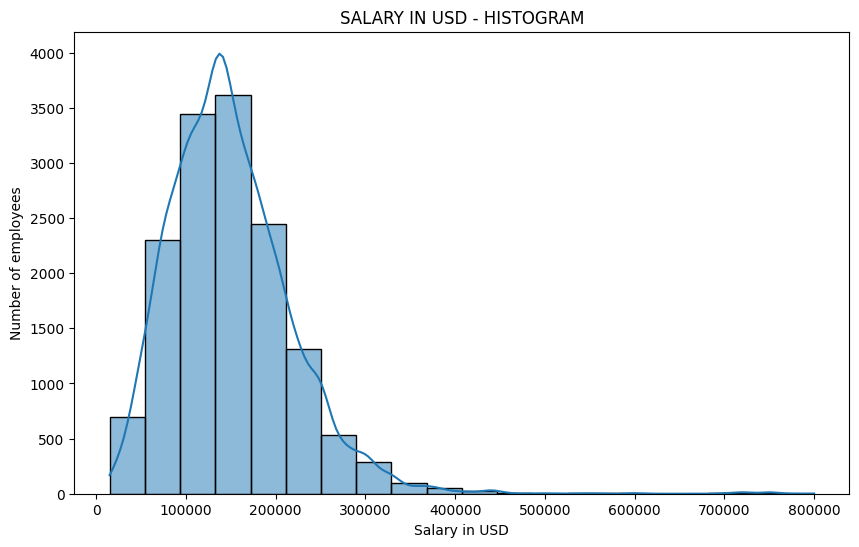

In [27]:
# a histogram of salaries
plt.figure(figsize=(10, 6))
sns.histplot(data['salary_in_usd'], bins=20, kde=True)
plt.title('SALARY IN USD - HISTOGRAM')
plt.xlabel('Salary in USD')
plt.ylabel('Number of employees')
plt.show()

In [16]:
# mean salary by experience levels
average_salary_by_experience = data.groupby('experience_level')['salary_in_usd'].mean()
print(average_salary_by_experience)

experience_level
EN     91656.841463
EX    194730.210884
MI    125386.553054
SE    163700.967100
Name: salary_in_usd, dtype: float64


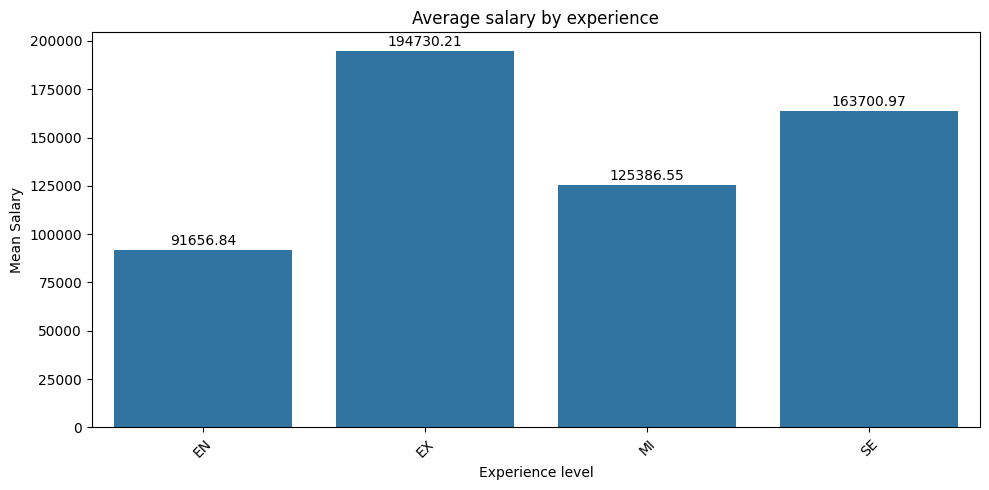

In [23]:
# plotting a barplot of mean salary by experience levels
plt.figure(figsize=(10, 5))
sns.barplot(x=average_salary_by_experience.index, y=average_salary_by_experience.values)
plt.title('Average salary by experience')
plt.xlabel('Experience level')
plt.ylabel('Mean Salary')
plt.xticks(rotation=45)  
for index, value in enumerate(average_salary_by_experience):
    plt.text(index, value + 1000, f'{value:.2f}', ha='center', va='bottom')
plt.tight_layout() 
plt.show()

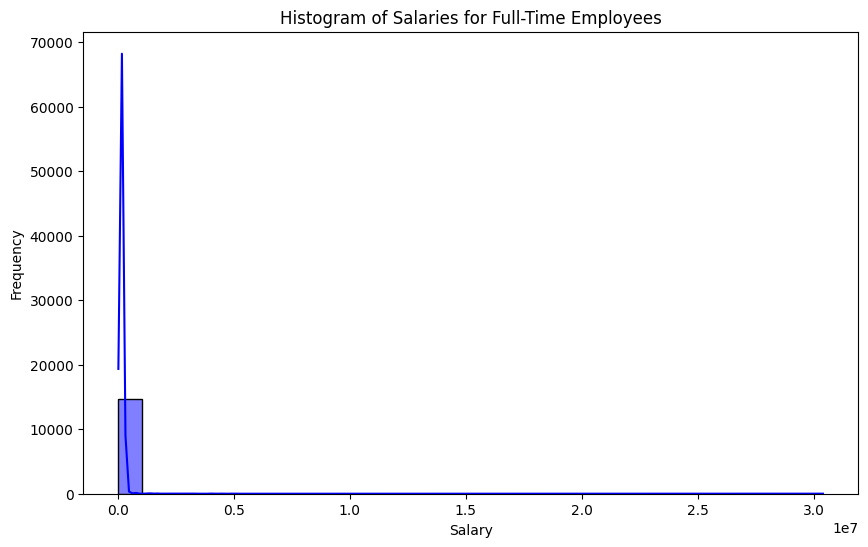

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data[data['employment_type'] == 'FT']['salary'], kde=True, color='blue', bins=30)
plt.title('Histogram of Salaries for Full-Time Employees')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()